# Milestone 1
- Nama      : Irfan Risqy Trianto
- Batch     : BSD - 001

Program ini dilakukan untuk menyelesaikan case SMART dari Airbnb

Dashboard : https://public.tableau.com/app/profile/irfan.risqy/viz/DashboardM1/Dashboard2?publish=yes

## Identifikasi Masalah

### a. Latar Belakang

New York merupakan salah satu kota di dunia yang paling banyak diminati sebagai destinasi untuk dikunjungi. Ada banyak alasan mengapa orang-orang tertarik untuk mendatangi New York, mulai dari perjalanan bisnis hingga liburan. Walaupun biaya tempat tinggal atau penginapan di New York tergolong mahal, namun dengan terus berkembangnya teknologi sekarang mulai banyak opsi penginapan yang menawarkan harga yang terjangkau. Salah satu penyedia akomodasi penginapan tersebut adalah Airbnb. Airbnb merupakan online marketplace yang menyediakan akomodasi bagi orang-orang yang ingin menyewa ataupun menyewakan kamar pribadi, apartment, villa ataupun rumahnya. Pada umumnya, properti yang ditawarkan layanan akomodasi ini dapat disewa secara harian, harganya pun bervariasi dan tentunya bisa dipilih sesuai dengan lokasi serta budget yang kita inginkan.

### b. Topik Permasalahan

Sebagai salah satu bagian dari tim Business Development Airbnb, tujuan yang ingin dicapai yaitu untuk ekspansi cakupan property perusahaan pada suatu kawasan untuk meningkatkan kehadiran Airbnb di pasar dan memenuhi beragam preferensi para pengunjung. Untuk mencapai hal itu, keputusan berbasis data sangat penting dalam mengidentifikasi kawasan yang memiliki potensi tinggi untuk dilakukan ekspansi serta mengoptimalkan mitra untuk memaksimalkan pendapatan dan kepuasan pelanggan.

### c. Problem Statement

Ekspansi properti di New York pada kawasan yang memiliki potensi tinggi untuk meningkatkan penghuni/pengunjung Airbnb sebesar 15% dalam waktu 6 bulan. memperluas cakupan kawasan properti Airbnb untuk meningkatkan pengalaman menginap customer dan juga meningkatkan sinergi kerjasama dengan mitra.

### d. Penjabaran Masalah

- sort daerah by number of reviews.
- mencari tahu daerah mana yang paling banyak di listing.
- mencari tahu tipe kamar yang paling banyak.
- mencari tahu harga per daerah.
- mencari keywords name untuk listing
- sort room type by daerah rame
- min max average harga top 5 number of reviews
- 

## Data Loading

In [118]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

Import Library yang digunakan untuk keperluan analisa

In [119]:
# Menampilkan data menjadi Dataframe
df = pd.read_csv("AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Dataset yang saya pakai ini berjudul New York City Airbnb Open Data dan saya dapatkan dari situs kaggle.com dengan link 'https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv'. Dataset ini berisikin informasi yang dibutuhkan untuk mencari tau tentang persebaran mitra Airbnb dan beberapa metrik untuk melakukan prediksi dan mengambil kesimpulan. Dataset ini terdiri dari 16 kolom yaitu;


| nama kolom | deskripsi |
|------------|-----------|
| id        | Berisikan informasi tentang id listing dari masing-masing host atau mitra.|
| name      | Berisikan tentang nama dari properti yang di listing oleh mitra.|
| host_id   | Berisikan informasi mengenai id dari masing|masing mitra.|
| host_name | Nama dari masing-masing mitra.|
| neighbourhood_group | Berisikan nama kawasan di New York dengan cakupan area yang besar.|
| neighbourhood | Berisikan nama kawasan di New York dengan cakupan area yang kecil.|
| latitude | Tata letak suatu kawasan berdasarkan garis horisontal.|
| longitude | tata letak suatu kawasan berdasarkan garis lintang.|
| room_type | Jenis kamar yang sudah di listing oleh mitra.|
| price | Harga sewa harian kamar dalam dollar.|
| minimum_nights | Minimum penyewaan permalam.|
| number_of_review | Jumlah review oleh customer.|
| last_review | Tanggal kapan terakhir kali properti di review oleh customer.|
| reviews_per_mont | Tingkat berapa banyakanya properti di review dalam jangka waktu per-bulan.|
| calculated_host_listing | Jumlah listing yang dilakukan mitra.|
| avaibility_365 | Jumlah hari ketersediaan properti selama 1 tahun.|

## Data Cleaning

In [120]:
# Mencari informasi tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Berdasarkan hasil yang didapatkan dari info bisa dilihat jika terdapat 16 kolom dan 48895 baris dengan 3 kolom memiliki data type float, 7 integer dan 6 object.

In [121]:
# Mencari jumlah missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

dapat dilihat tedapat 16 missing values pada kolom name, 21 missing values pada kolom host_name dan 10052 missing values pada kolom last_review dan reviews_per_month.

In [122]:
# Handling missing values
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

isi missing values pada kolom reviews_per_month menjadi 0.

In [123]:
# Drop column yang tidak digunakan
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)
df.head(5)


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


drop kolom id, host_name dan last_review karena dalam analisis ini tidak mempunyai fungsi yang signifikan.

In [124]:
# Drop sisa missing values
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               48879 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                48879

drop sisa missing values yang tersisa dan bisa terlihat jika non-null count pada setiap kolom menjadi sama.

In [125]:
# Ambil jumlah number_of_reviews yang diatas 50
df1 = df[df['number_of_reviews'] >= 50]

# Mengurutkan dataframe baru berdasarkan jumlah pengunjung paling banyak
df2 = df1.sort_values(by='number_of_reviews', ascending=False)

# Mereset indeks dari dataframe yang sudah diurutkan
df50 = df2.reset_index(drop=True)

df50

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
1,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
3,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
4,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,Studio in South Williamsburg,7776144,Brooklyn,Williamsburg,40.71171,-73.96101,Entire home/apt,136,30,50,0.72,1,0
7077,Lower East Side Bedroom w. A/C and Cappuccinos!,147536196,Manhattan,Lower East Side,40.71980,-73.98209,Private room,135,1,50,2.35,1,32
7078,Beautiful private bedroom/bath in private house,93339222,Brooklyn,Gowanus,40.67968,-73.99066,Private room,125,2,50,3.19,1,80
7079,Bed Stuy Beautiful !!!!,143807664,Brooklyn,Bedford-Stuyvesant,40.68606,-73.93861,Entire home/apt,100,3,50,2.16,1,96


mengambil data yang memiliki number of reviews nya >= 50 karena nilai sum number of reviews >= 50 sudah mewakili sekitar 65-70% sum number of reviews keseluruhan.

## Analisis dan Perhitungan

### a. Visualisasi

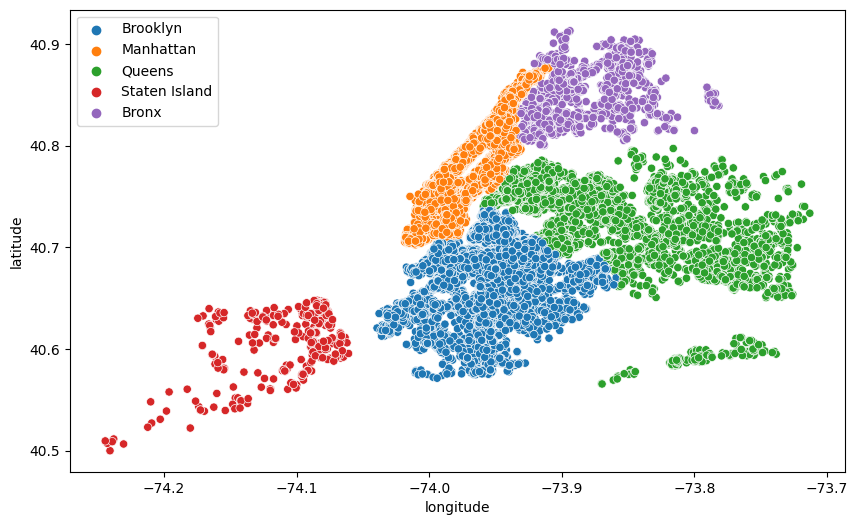

In [126]:
# Scatter Map
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)

plt.legend()
plt.show()

Bisa dilihat dari scatter plot map menggunakan latitude dan longitude yang dihasilkan yaitu titik persebaran daerah di New York berdasarkan neighbourhood_group yaitu Queens, Manhattan, Brooklyn, Staten Island dan Bronx.

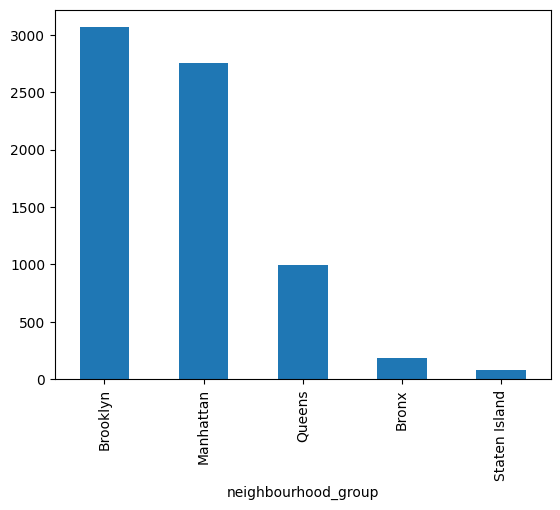

In [127]:
# Matplotlib Bar Chart
df50['neighbourhood_group'].value_counts().plot(kind='bar')
plt.show()

Bisa dilihat dari bar chart persebaran jumlah listing properti Airbnb yang ada di New York. Dari bar chart ini bisa disimpulkan jika Brooklyn dan Manhattan memiliki jumlah listing Airbnb terbanyak ketimbang 3 daerah lainnya.

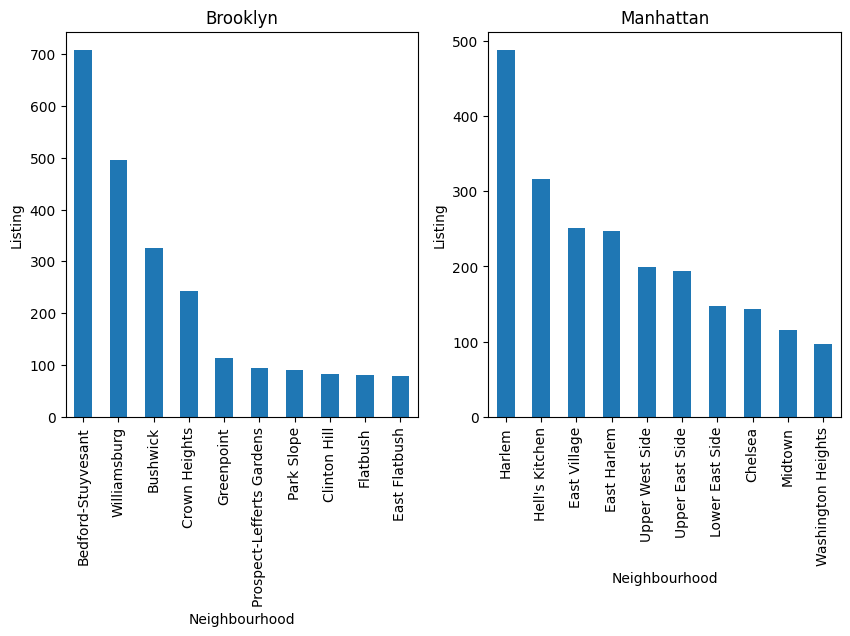

In [128]:
# Bar Chart Subplot
fig, axes = plt.subplots(1,2, figsize=(10,5))

# Bar Chart Neighbourhood Brooklyn 
df50['neighbourhood'][df50['neighbourhood_group']=='Brooklyn'].value_counts()[:10].plot(kind='bar', ax=axes[0])
axes[0].set_title('Brooklyn')
axes[0].set_xlabel('Neighbourhood')
axes[0].set_ylabel('Listing')

# Bar Chart Neighbourhood Manhattan
df50['neighbourhood'][df50['neighbourhood_group']=='Manhattan'].value_counts()[:10].plot(kind='bar', ax=axes[1])
axes[1].set_title('Manhattan')
axes[1].set_xlabel('Neighbourhood')
axes[1].set_ylabel('Listing')

plt.show()

Karena tujuan dari analisa ini adalah untuk ekspansi di daerah yang ramai dan berpotensi, maka yang diambil hanya yang teramai, maka dari itu saya mengambil hanya daerah Manhattan dan Brooklyn. Berikut ini adalah persebaran listing terbanyak berdasarkan daerah yang berada di daerah Brooklyn dan Manhattan dan diurutkan berdasarkan 10 daerah dengan listing terbanyak dari 2 Manhattan dan Brooklyn.

In [129]:
# Memilih baris yang hanya terkait dengan kota Manhattan
df_manhattan = df50[df50['neighbourhood_group'] == 'Manhattan']

# Memilih baris yang hanya terkait dengan kota Brooklyn
df_brooklyn = df50[df50['neighbourhood_group'] == 'Brooklyn']

# Menggabungkan dataframe kota Manhattan dan Brooklyn
df50com = pd.concat([df_manhattan, df_brooklyn])

# Reset index
df50bm = df50com.reset_index(drop=True)


Dikarenakan saya hanya mengambil dari Manhattan dan Brooklyn, maka saya memutuskan untuk slicing dataframe berdasarkan hanya Brookyln dan Manhattan.

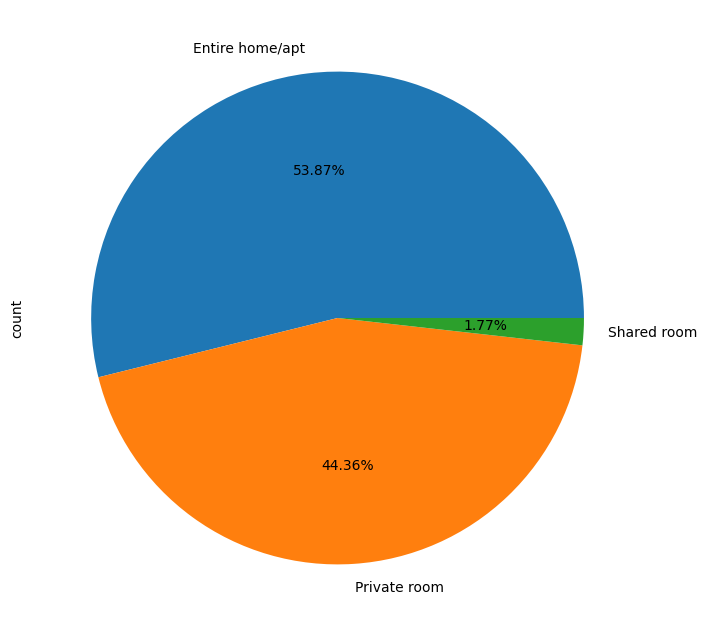

In [130]:
# Membuat Pie Chart
fig,ax1 = plt.subplots(figsize=(8,8))

df50bm['room_type'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Setelah mendapat 2 neighbourhood yang ramai, sekarang saya mencari jenis kaamr apa yang paling banyak diminati, bisa dilihat jika jenis kamar private room dan entire home/apt memiliki peminat yang banyak sedangkan room type shared room hanya memiliki 1.77% peminat.

In [131]:
# Slicing dataframe
dfbm = df50bm[df50bm['room_type'] != 'Shared room']
dfbm


C:\Users\irfan\AppData\Local\Temp\ipykernel_14720\430070344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbm.replace(0, 10, inplace=True)


Karena dari hasil pie chart mendapatkan 2 jenis kamar yang paling banyak peminat, saya memutuskan untuk membuang listing yang memiliki room type shared room agar proses analisa data lebih akurat.

c:\Users\irfan\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


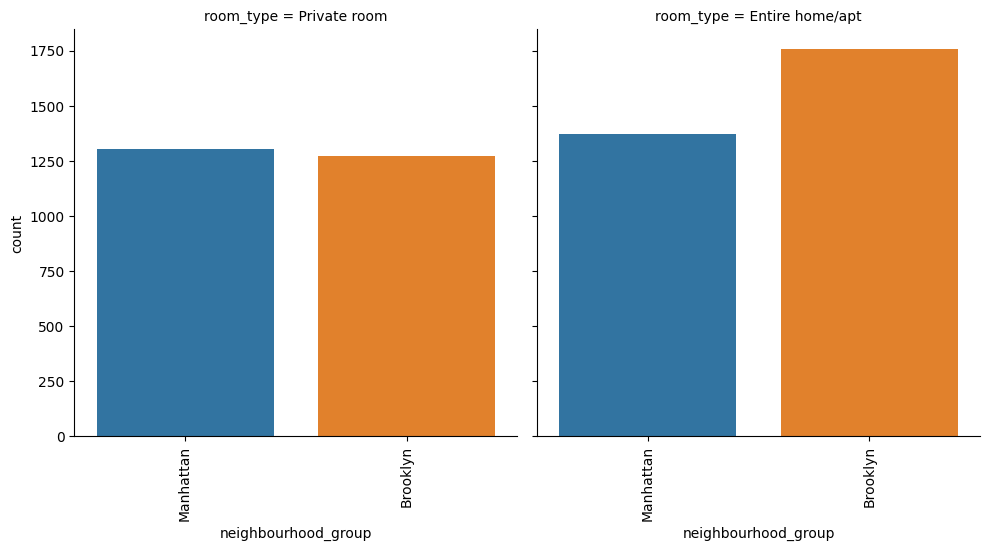

In [132]:
# Bar Chart
viz_3=sns.catplot(x='neighbourhood_group', col='room_type', data=dfbm, kind='count')
viz_3.set_xticklabels(rotation=90)

Membuat bar chart bedasarkan persebaran room type di kota Manhattan dan Brooklyn. Bisa dilihat room type private room lebih memiliki jumlah listing lebih banyak di Manhattan ketimbang Brooklyn namun hanya berbeda tipis. Sedangkan untuk room type entire home/apt di kota Brooklyn jauh lebih banyak listingnya ketimbang di Manhattan. 

c:\Users\irfan\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


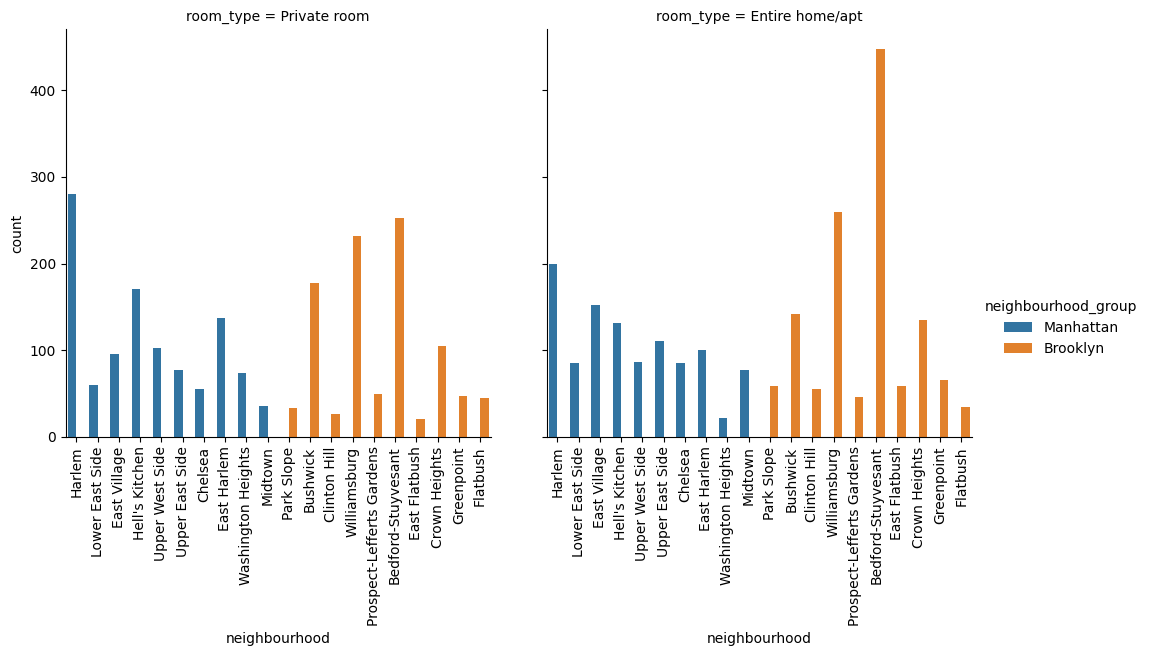

In [133]:
# Bar Chart
dfbm20 =dfbm.loc[dfbm['neighbourhood'].isin(['Bedford-Stuyvesant','Williamsburg','Bushwick','Crown Heights','Greenpoint',
                 'Prospect-Lefferts Gardens','Park Slope','Clinton Hill','Flatbush','East Flatbush','East Flatbush',
                 'Harlem','Hell\'s Kitchen','East Village','East Harlem','Upper West Side','Upper East Side','Lower East Side','Chelsea','Midtown','Washington Heights'])]

viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=dfbm20, kind='count')
viz_3.set_xticklabels(rotation=90)

Agar lebih mudah untuk menentukan daerah yang spesifik, disini saya menampilkan persebaran room type dari masing-masing daerah di Manhattan dan Brooklyn. Bisa dilihat di daerah Bedford-Stuyvsent memiliki jumlah listing room type Entire home/apt terbanyak ketimbang daerah lain dan untuk listing type private room terbanyak berada di Manhattan tepatnya ada di Harlem. Namun masih ada beberapa daerah yang memiliki listing sedikit, seperti di East Flatbush dan Clinton Hill. Daerah daerah yang memiliki listing masih rendah tersebut memiliki potensi untuk melakukan marketing initiative terlebih jika daerah tersebut memiliki jarak yang dekat dengan daerah ramai seperti Williamsburg dan Harlem.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

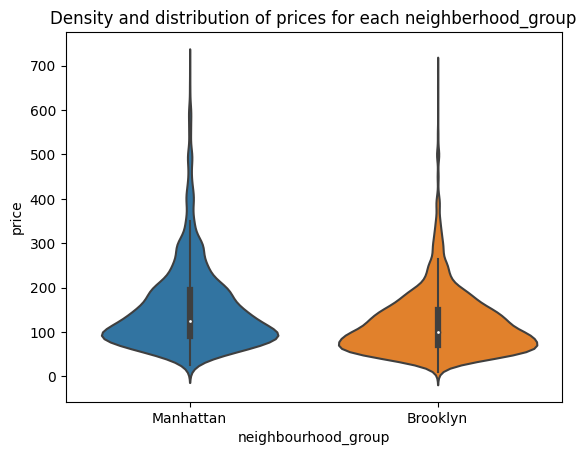

In [134]:
# Membuat Violin Chart
dfbmv=dfbm[dfbm.price < 700]

viz_2=sns.violinplot(data=dfbmv, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Dari violin chart diatas ini dapat terlihat jumlah density dan distribution listing harga di Manhattan dan Brooklyn. Bisa dilihat harga listing paling banyak di Manhattan berkisar di angka 100 USD. Sementara itu untuk di Brooklyn harga listing paling banyak berkisar di angka 90 USD. Hal ini sejalan dengan reputasi Manhattan sebagai salah satu kawasan padat dan menjadi salah satu kawasan yang menjadi destinasi wisata.

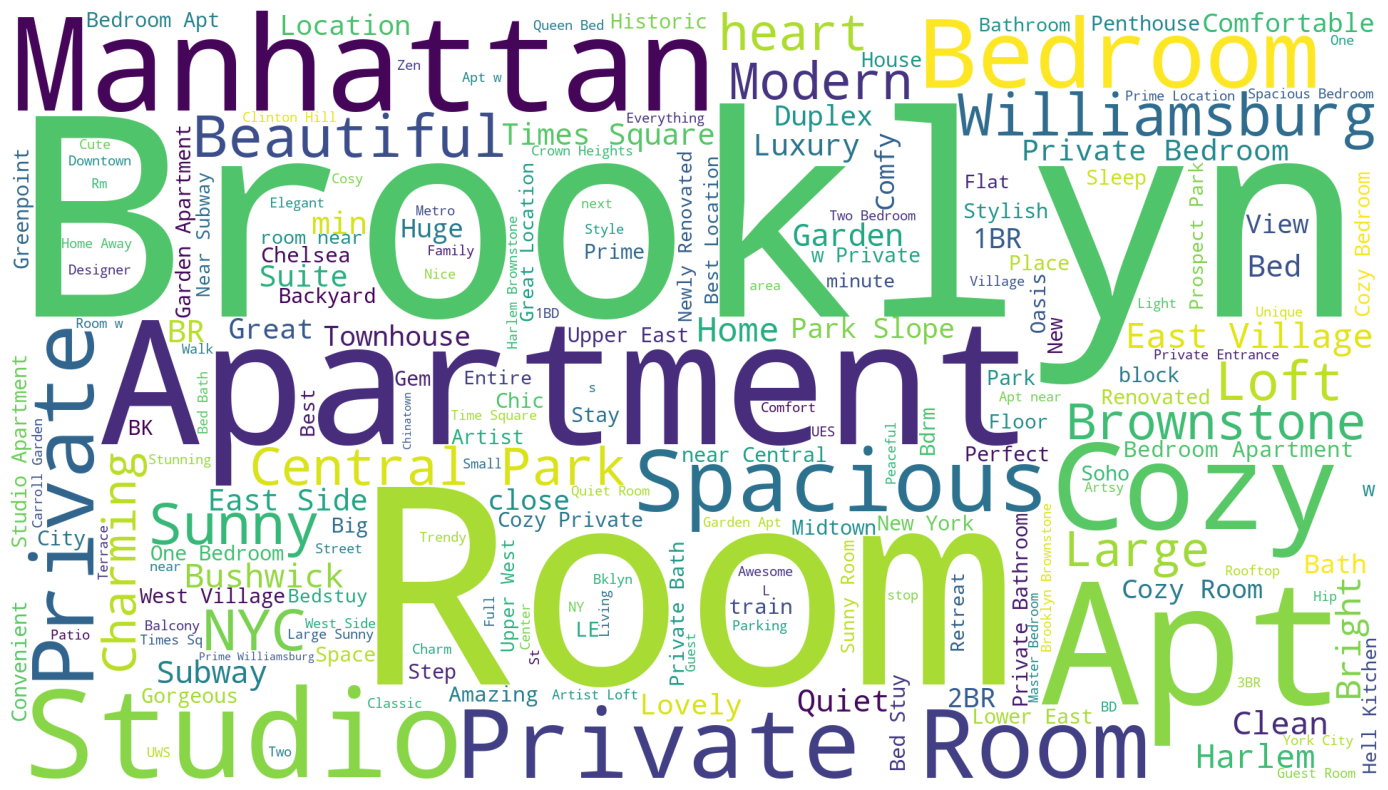

In [135]:
# WordClouds
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dfbm.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Visualisasi diatas adalah seberapa banyak keyword yang paling banyak dipakai untuk kebutuhan listing. Bisa dilihat keyword Apartment, Brooklyn, Room, Apt merupakan keyword yang paling banyak dipakai untuk listing. Visualisasi ini bisa berguna untuk feedback kepada host atau mitra Airbnb untuk menggunakan keyword yang populer untuk keperluan listing mereka.

### b. Statistical Analysis

#### Central Tendency

In [136]:
# Slicing dataframe berdasarkan neighbourhood
df_manhattan = dfbm[dfbm['neighbourhood_group'] == 'Manhattan']
df_brooklyn = dfbm[dfbm['neighbourhood_group'] == 'Brooklyn']

# Slicing dataframe Manhattan berdasarkan room type
priv_man = df_manhattan[df_manhattan['room_type'] == 'Private room']
ent_man = df_manhattan[df_manhattan['room_type'] == 'Entire home/apt']

# Slicing dataframe Brooklyn berdasarkan room type
priv_bro = df_brooklyn[df_brooklyn['room_type'] == 'Private room']
ent_bro = df_brooklyn[df_brooklyn['room_type'] == 'Entire home/apt']

Agar mendapatkan perhitungan yang spesifik, saya memutuskan untuk slicing dataframe berdasarkan room type di daerah Brooklyn dan Manhattan.

In [137]:
# Menghitung rata-rata, max dan min harga roomtype Private di Manhattan
print('Rata-rata harga pada kawasan ini adalah:',priv_man['price'].mean(),'USD')
print('Rentan harga tertinggi pada kawasan ini adalah:',priv_man['price'].max(),'USD') 
print('Rentan harga terendah pada kawasan ini adalah:',priv_man['price'].min(),'USD')


Rata-rata harga pada kawasan ini adalah: 97.85604900459418 USD
Rentan harga tertinggi pada kawasan ini adalah: 429 USD
Rentan harga terendah pada kawasan ini adalah: 25 USD


Bisa dilihat untuk room type Private di Manhattan memiliki rata-rata harga 97.8560 USD, rentan harga tertinggi sebesar 429 dan rentan harga terendah sebesar 25 USD.

In [138]:
# Menghitung rata-rata, max dan min harga roomtype entire room di Manhattan
print('Rata-rata harga pada kawasan ini adalah:',ent_man['price'].mean(),'USD')
print('Rentan harga tertinggi pada kawasan ini adalah:',ent_man['price'].max(),'USD') 
print('Rentan harga terendah pada kawasan ini adalah:',ent_man['price'].min(),'USD')

Rata-rata harga pada kawasan ini adalah: 218.53168244719592 USD
Rentan harga tertinggi pada kawasan ini adalah: 2990 USD
Rentan harga terendah pada kawasan ini adalah: 49 USD


Bisa dilihat untuk room type Entire Room di Manhattan memiliki rata-rata harga 218.531 USD, rentan harga tertinggi sebesar 2990 dan rentan harga terendah sebesar 49 USD.

In [139]:
# Menghitung rata-rata, max dan min harga roomtype Private di Brooklyn
print('Rata-rata harga pada kawasan ini adalah:',priv_bro['price'].mean(),'USD')
print('Rentan harga tertinggi pada kawasan ini adalah:',priv_bro['price'].max(),'USD') 
print('Rentan harga terendah pada kawasan ini adalah:',priv_bro['price'].min(),'USD')

Rata-rata harga pada kawasan ini adalah: 71.61773940345368 USD
Rentan harga tertinggi pada kawasan ini adalah: 319 USD
Rentan harga terendah pada kawasan ini adalah: 10 USD


Bisa dilihat untuk room type Private di Brooklyn memiliki rata-rata harga 71.617 USD, rentan harga tertinggi sebesar 319 USD dan rentan harga terendah sebesar 10 USD.

In [140]:
# Menghitung rata-rata, max dan min harga roomtype entire room di Brooklyn
print('Rata-rata harga pada kawasan ini adalah:',ent_bro['price'].mean(),'USD')
print('Rentan harga tertinggi pada kawasan ini adalah:',ent_bro['price'].max(),'USD') 
print('Rentan harga terendah pada kawasan ini adalah:',ent_bro['price'].min(),'USD')

Rata-rata harga pada kawasan ini adalah: 158.78295454545454 USD
Rentan harga tertinggi pada kawasan ini adalah: 1395 USD
Rentan harga terendah pada kawasan ini adalah: 10 USD


Bisa dilihat untuk room type entire room di Brooklyn memiliki rata-rata harga 158.782 USD, rentan harga tertinggi sebesar 1395 USD dan rentan harga terendah sebesar 10 USD.

#### Regression Analysis

In [141]:
# Drop Columns
dfbm.drop(['name','host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

dfbm.head(5)

C:\Users\irfan\AppData\Local\Temp\ipykernel_14720\3475965817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbm.drop(['name','host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)


,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Manhattan,Private room,49,1,3,293
1,Manhattan,Private room,49,1,3,342
2,Manhattan,Private room,49,1,3,339
3,Manhattan,Private room,99,2,1,179
4,Manhattan,Private room,60,1,2,258


In [142]:
# Encode variabel selain yang di drop
def Encode(dfbm):
    for column in dfbm.columns[dfbm.columns.isin(['neighbourhood_group', 'room_type'])]:
        dfbm[column] = dfbm[column].factorize()[0]
    return dfbm

dfbm_en = Encode(dfbm.copy())
dfbm_en

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,49,1,3,293
1,0,0,49,1,3,342
2,0,0,49,1,3,339
3,0,0,99,2,1,179
4,0,0,60,1,2,258
...,...,...,...,...,...,...
5811,1,1,229,1,1,188
5812,1,0,38,2,3,126
5813,1,1,136,30,1,10
5814,1,0,125,2,1,80


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

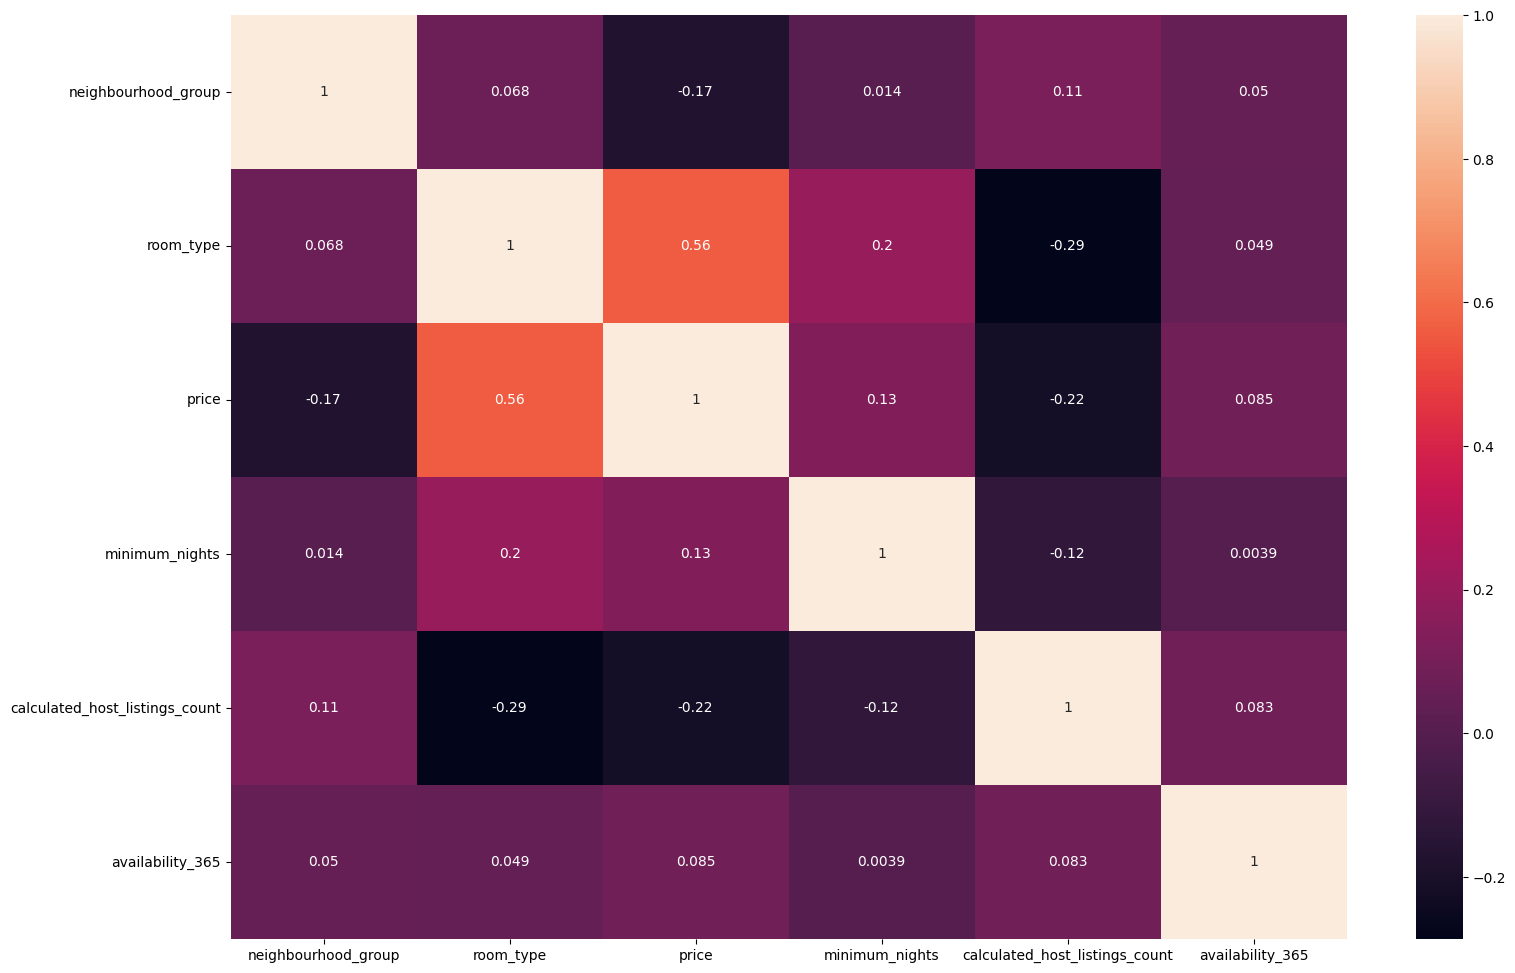

In [143]:
# Melihat korelasi antar variabel
corr = dfbm_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
dfbm_en.columns

Berdasarkan Regression Analysis yang dilakukan dapat terlihat masing-masing korelasi antar variabel, secara keseluruhan antar variabel tidak memiliki korelasi yang besar namun ada 2 variabel yang memiliki tingkat korelasi yang lumayan besar yaitu variabel price dan room_type. Hal ini sejalan karena memang harga berpengaruh dengan room_type yang di listing. 

## Pengambilan Kesimpulan

Berdasarkan analisa data Airbnb yang sudah saya lakukan, terdapat beberapa kesimpulan yang dapat diambil:

- Lokasi Populer: Daerah yang paling ramai dalam hal pemesanan Airbnb terletak di Manhattan dan Brooklyn seperti daerah Bedford-Stuyvesant, Williamsburg, Bushwick, Harlem, Hell's Kitchen dan East Village. Namun masih ada beberapa daerah yang sedikit listing-nya di Manhattan dan Brooklyn seperti Clinton Hill, Flatbush, East Flatbush, Washington Heights, Midtown dan Chelsea. Namun secara keseluruhan daerah Manhattan dan Brooklyn ini menawarkan daya tarik yang tinggi bagi para pendatang, baik karena aksesibilitasnya yang baik, atraksi wisata, atau alasan lainnya.

- Tipe Kamar Paling Diminati: Tipe kamar yang paling banyak diminati oleh pengguna Airbnb adalah private room dan entire apartment. Hal ini mungkin menunjukkan bahwa banyak pendatang atau tamu yang lebih memilih privasi dan kenyamanan yang ditawarkan oleh kamar pribadi atau seluruh apartemen dibandingkan dengan opsi lain seperti shared room.

- Rentang Harga yang Populer: Rentang harga yang paling populer di Manhattan untuk tipe kamar private room adalah 97 USD dan untuk tipe kamar entire room adalah 218 USD. Sedangkan untuk di daerah Brooklyn rentang harga yang paling populer di Brooklyn untuk tipe kamar private room adalah 71 USD dan untuk tipe kamar entire room adalah 158 USD. Fakta bahwa rentang harga ini memiliki banyak permintaan dapat mengindikasikan bahwa harga tersebut dianggap wajar oleh banyak pendatang dan mereka bersedia membayar untuk kenyamanan dan fasilitas yang ditawarkan oleh tujuan penginapan Airbnb.

- Keyword Listing Populer: Keyword yang populer untuk listing Airbnb adalah 'Room', 'Apt', 'Brooklyn', dan 'Apartment'. Daftar ini berguna untuk host atau mitra saat ingin listing.

Dalam bisnis atau strategi pemasaran, informasi ini dapat sangat berharga. Ini menunjukkan kecenderungan pengguna dan preferensi mereka dalam hal lokasi, tipe kamar, dan kisaran harga. Berdasarkan kesimpulan ini, pemilik properti atau pengelola Airbnb dapat mengarahkan upaya mereka untuk lebih fokus pada daerah-daerah populer seperti Manhattan dan Brooklyn, serta memastikan bahwa ada banyak penawaran private room dan entire apartment dengan harga yang sesuai dengan kisaran yang telah dihitung. Hasil analisa ini juga bermanfaat bagi host Airbnb karena pihak Airbnb bisa memberikan feedback sesuai temuan yang telah didapat dan bisa menaikan pemasukan host dan juga Airbnb.

In [146]:
# Save dataframe ke csv
df.to_csv('df.csv', index=False)
df50.to_csv('df50.csv', index=False)
df50bm.to_csv('df50bm.csv', index=False)
dfbm.to_csv('dfbm.csv', index=False)

